In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

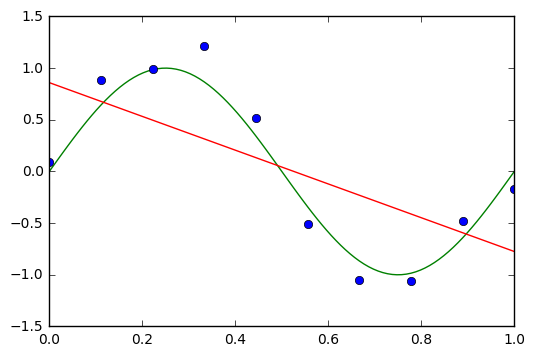

In [32]:
def sin_func(x):
    return np.sin(2*np.pi*x)

x_display = np.linspace(0, 1, 100)
t_no_noise_display = sin_func(x_display)

N = 10
x = np.linspace(0, 1, N)
t = sin_func(x) + 0.2*np.random.randn(len(x))

# linear regression 
mdl = sklearn.linear_model.LinearRegression()
X = x.reshape(N, 1)
mdl.fit(X, t)
y = mdl.predict(X)

plt.plot(x_display, t_no_noise_display, '-g')
plt.plot(x, t, 'ob')
plt.plot(x, y, '-r')

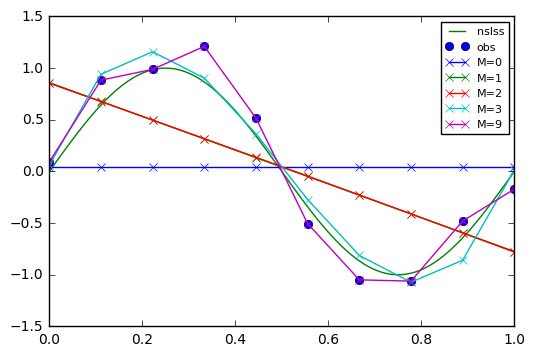

In [50]:
#polynomial regression
fig, ax = plt.subplots()
ax.plot(x_display, t_no_noise_display, '-g', label = 'nslss')
ax.plot(x, t, 'ob', label = 'obs')
for M in [0, 1, 2, 3, 9]:
    prep = sklearn.preprocessing.PolynomialFeatures(degree=M)
    X_poly = prep.fit_transform(X)
    mdl = sklearn.linear_model.LinearRegression()
    mdl.fit(X_poly, t)
    y = mdl.predict(X_poly)
    ax.plot(x, y, 'x-', label = 'M=%s' % M)
    ax.legend(loc=1,prop={'size':8})

In [16]:
import sklearn.pipeline 

In [17]:
for M in range(10):
    mdl = sklearn.pipeline.Pipeline(
        [('poly', sklearn.preprocessing.PolynomialFeatures(degree=M)),
         ('linear', sklearn.linear_model.LinearRegression())])
    mdl.fit(X, t) 
    print M, mdl.named_steps['linear'].coef_

0 [ 0.]
1 [ 0.         -1.24178852]
2 [ 0.         -2.8297066   1.58791808]
3 [  0.           4.83834014 -18.62179295  13.47314069]
4 [  0.           1.04730201   0.52294961 -17.23426817  15.35370443]
5 [   0.           -8.34466997   78.81086093 -238.52809751  269.00653712
 -101.46113308]
6 [   0.          -14.00444185  148.63698406 -539.06627884  849.78932484
 -618.07756954  172.20547882]
7 [  0.00000000e+00   6.33371399e+00  -1.86958506e+02   1.45105331e+03
  -4.77739527e+03   7.58799765e+03  -5.78299590e+03   1.70148611e+03]
8 [  0.00000000e+00   1.86703072e+01  -4.35743579e+02   3.32753451e+03
  -1.18563169e+04   2.23256322e+04  -2.29769028e+04   1.22283679e+04
  -2.63172045e+03]
9 [  0.00000000e+00  -2.09756789e+02   4.84052439e+03  -4.41977514e+04
   2.11411140e+05  -5.85937851e+05   9.73017716e+05  -9.53824550e+05
   5.08480549e+05  -1.13580504e+05]
